# Naive Bayes vs LDA

## Naive Bayes Classifier


<li> In this example, we have a dataset that consists of  the individuals who are classified whether or not they buy a car, based on their Estimated Salary
<li> The dataset we use is 'Social_Network_Ads.csv'

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/viki4/Desktop/Data Science/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

<li> The above block of code reads the csv file from the location and assigns the data to X and Y

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<li> The above block of code splits the data into Test and Training sets.
<li> In this case, we have considered the Test set to be 25% of the actual data.

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<li> Feature Selection is one important tool in Machine Learning.
<li> It's about how we normalize the range of each of our feature so that it can't dominate from one to another.
<li> Scikitlearn library has a class named StandardScaler which is used for scaling the data.


In [35]:
# Fitting Naive Bayes to the Training set 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

<li> The above block of code designs a Naive Bayes classification model using GaussianNB class of the sklearn library.
<li> We then fit this model to our Training Set

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

<li> Using the above block of code, we check how well the model performs on the Test set.

In [37]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

<li> Here, we design a confusion matrix to check the number of incorrect predictions.
<li> In this case, the number of incorrect predictions is 10 out of 100

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.90000000000000002

<li> The above block of code predicts the accuracy of the model, which turns out to be 90% 

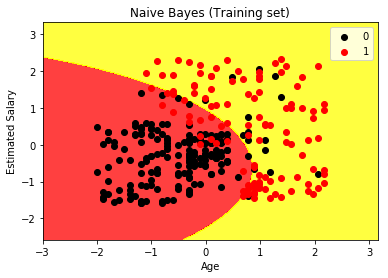

In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'red'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


<li>Here, we visualize the Naive Bayes classifier on our Training Set.
<li>We get a smooth curve, with no irregularities.
<li> It manages all the users with low Estimated Salary who had bought the SUVs

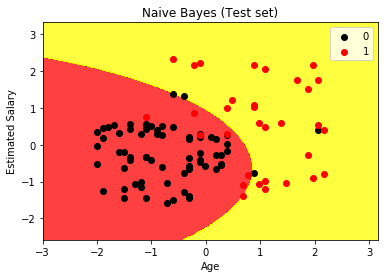

In [17]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'red'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<li>Here, we visualize the Naive Bayes classifier on our Test Set.
<li>We can see that users who didn't buy the SUVs, which is represented by Red region, were predicted correctly by the Naive Bayes Classifier
<li>Also, The users who bought the SUVs, represented by the Yellow region were predicted correctly.

## Linear Discriminant Analysis

In [18]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDAclassifier = LinearDiscriminantAnalysis()
LDAclassifier.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

<li> The above block of code designs a LDA model using the LinearDiscriminantAnalysis class of the sklearn library
<li> We then fit the model to our Training Set

In [19]:
y_pred_LDA = LDAclassifier.predict(X_test)

In [20]:
y_pred_LDA

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
drA = lda.transform(X_test)

In [26]:
from sklearn import cross_validation
lda = LinearDiscriminantAnalysis()
k_fold = cross_validation.KFold(len(X_train), 3, shuffle=True)
print('LDA Results: ')
for (trn, tst) in k_fold:
    lda.fit(X_train, y_train)
    outVal = lda.score(X_train, y_train)
    #Compute classification error
print('Score: ' + str(outVal))

LDA Results: 
Score: 0.83


<li> Here, we predict the accuracy of the model using LinearDiscriminantAnalysis() which turns out to be 83%

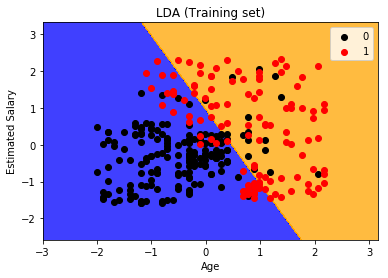

In [41]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'red'))(i), label = j)
plt.title('LDA (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

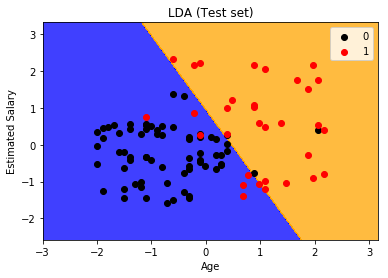

In [40]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'red'))(i), label = j)
plt.title('LDA (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<li> The above block of code visualizes the performance of the LDA model on the Training and test Sets.

<li> From the above observations, we can see that the accuracy of the Naive Bayes model turns out to be 90% whereas that of the Linear Discriminant Analysis model is 83%.
<li> So, we can say that, in this case, the Naive Bayes classifier performs better than the LDA.

## References
<li>http://scikit-learn.org/stable/modules/naive_bayes.html
<li>http://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html